## Simple Moving Average Crossover Strategy with backtrader (Tesla stock)

### Moving Average Crossover Strategy

A moving average crossover strategy is a popular trading strategy used by technical analysts. It involves using two or more moving averages of different time periods to generate buy and sell signals based on the crossover of these averages.

Here's how a typical moving average crossover strategy works:

Selecting Moving Averages: The strategy starts by choosing two moving averages, typically a shorter-term moving average and a longer-term moving average. For example, a common combination is the 50-day moving average (shorter-term) and the 200-day moving average (longer-term).

Identifying Signal: When the shorter-term moving average crosses above the longer-term moving average, it generates a bullish signal or a buy signal. This crossover suggests that the stock's price momentum is turning positive, indicating a potential upward trend.

Conversely, when the shorter-term moving average crosses below the longer-term moving average, it generates a bearish signal or a sell signal. This crossover suggests that the stock's price momentum is turning negative, indicating a potential downward trend.

Entry and Exit: When a bullish crossover occurs, a trader may enter a long position or buy the asset. Conversely, when a bearish crossover occurs, a trader may exit the long position or consider selling the asset.

Some traders may also use additional criteria or confirmatory indicators to filter signals and reduce false crossovers. This can help improve the accuracy of the strategy and reduce the number of false trading signals.

Risk Management: Like any trading strategy, risk management is crucial. Traders typically employ stop-loss orders to limit potential losses and implement profit targets to capture profits. These risk management techniques help control the downside risk and protect against adverse market movements.

The moving average crossover strategy aims to identify trends and capture potential price movements. It is based on the assumption that crossovers of different moving averages can provide insights into shifts in market sentiment and the potential for price continuation or reversal.

Traders often use moving average crossovers on various timeframes, such as daily, weekly, or monthly, depending on their trading style and the asset being analyzed. It's important to note that moving average crossovers may generate false signals in ranging or choppy markets, so proper risk management and additional analysis are essential for successful implementation of the strategy.


### Backtrader

Backtrader is a popular open-source Python framework designed for backtesting trading strategies. It provides a comprehensive set of tools and features to simulate and evaluate the performance of trading strategies using historical market data.

Backtesting is a crucial step in quantitative trading where traders evaluate the viability of their trading strategies using past market data. It allows traders to assess how their strategies would have performed under different market conditions, helping them make informed decisions about strategy development and optimization.

backtrader simplifies the process of backtesting by providing an intuitive and flexible framework. It allows users to define their trading strategies using Python code and test them against historical data. The framework supports various types of data feeds, including CSV files, Pandas DataFrames, and live data sources. It also offers a wide range of built-in technical indicators, analyzers, and risk management tools that can be integrated into the trading strategy.

The main steps involved in using backtrader are as follows:

Data Preparation: Users need to gather historical market data for the instruments they want to trade and prepare it in a compatible format. backtrader supports various data sources and formats, making it flexible to work with different datasets.

Strategy Development: Traders define their trading strategies by implementing the necessary logic in Python code. This includes specifying entry and exit conditions, position sizing, risk management rules, and any other custom requirements.

Backtest Execution: The prepared data and trading strategy are integrated into the backtrader framework. The backtest is then executed, simulating the trading strategy on historical data and generating the corresponding buy/sell signals.

Performance Evaluation: backtrader provides a wide range of performance metrics, such as returns, risk-adjusted measures, drawdowns, and trade statistics. These metrics allow traders to evaluate the effectiveness and robustness of their strategies.

Strategy Optimization: Traders can iterate and refine their strategies by adjusting parameters, testing different variations, or employing optimization techniques. backtrader supports parameter optimization and sensitivity analysis, aiding in strategy improvement.

Live Trading: Once a strategy has been thoroughly backtested and optimized, backtrader can be used for live trading by connecting it to a brokerage or an API that supports real-time market data and order execution.

By utilizing backtrader, traders can gain valuable insights into the historical performance of their trading strategies, identify areas for improvement, and make informed decisions regarding risk management and position sizing. It serves as a powerful tool for both aspiring and experienced quantitative traders to develop and validate their strategies in a systematic and efficient manner.

### Cerebro

Let's explain cerebro, which is a key component of the backtrader framework:

cerebro is the central object in the backtrader framework that orchestrates the entire backtesting process. It acts as the engine that drives the backtest execution and manages the interaction between the data, strategies, and the broker.

Here's a simplified explanation of cerebro:

Initialization: To start using cerebro, you create an instance of the bt.Cerebro class. This object will serve as the container for all the components required for backtesting.

Data Loading: Historical market data is necessary for backtesting, and cerebro provides a mechanism to load this data. Data can be loaded from various sources, such as CSV files, Pandas DataFrames, or by connecting to live data providers.

Strategy Addition: You add your trading strategy to cerebro using the cerebro.addstrategy() method. This associates your strategy with the backtesting process.

Broker Configuration: cerebro enables you to configure the broker, which simulates the execution of trades and manages the portfolio and cash. You can set parameters like initial capital, commission fees, slippage, and leverage through the cerebro.broker object.

Analyzer Integration: cerebro allows the integration of various analyzers to evaluate and analyze the performance of the strategy. Analyzers provide valuable metrics and insights, such as returns, risk measures, drawdowns, and trade statistics.

Execution: Once the data, strategy, broker, and analyzers are set up, you execute the backtest by calling cerebro.run(). This triggers the execution of the defined strategy on the provided historical data, generating trade signals and simulating portfolio management.

Result Analysis: After the backtest is completed, cerebro provides access to various performance metrics, trade results, and statistics through the strategy object and the attached analyzers. These results allow you to assess the effectiveness and profitability of your trading strategy.

In summary, cerebro acts as the core of the backtrader framework, coordinating the different components required for backtesting. It brings together the data, strategy, broker, and analyzers to execute the backtest and provides the necessary tools to analyze the performance of the trading strategy. cerebro simplifies the process of backtesting by providing a unified interface and handling the complexities of data management, trade execution, and result analysis.

### Example - 5 days Moving Average with Tesla Stock

Step 1: Importing Libraries
The code begins by importing the necessary libraries for our quantitative trading strategy. These include backtrader for backtesting, pandas for data manipulation, yfinance for fetching stock data from Yahoo Finance, datetime for handling dates, warnings to suppress warnings, and quantstats for performance analysis.

In [1]:
import backtrader as bt
import pandas as pd
import yfinance as yf
from datetime import datetime as dt
import warnings
import quantstats as qs
warnings.filterwarnings("ignore")

Step 2: Setting Up Variables
Next, we set up variables for the start date, end date, and stock symbol. These variables define the time period and the specific stock we want to analyze.

In [2]:
start_date = '2015-01-01'
end_date = '2023-01-01'
symbol = 'TSLA'  # Tesla stock symbol

Step 3: Downloading and Preparing the Data: Historical data is downloaded using yfinance for the specified symbol and date range. The code selects the desired columns ('Open', 'High', 'Low', 'Close', 'Volume') and renames them to lowercase. The resulting DataFrame is stored in the variable df.

Step 4: Printing the DataFrame: The code prints the first few rows of the DataFrame df using the print(df.head()) statement to inspect the downloaded data.

In [3]:
# Download data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

print(df.head())  # Print the dataframe

[*********************100%***********************]  1 of 1 completed
                 open       high        low      close    volume
Date                                                            
2015-01-02  14.858000  14.883333  14.217333  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  51637500


Step 5: Defining the Strategy: The code defines a custom strategy called SmaCross by subclassing bt.Strategy. The strategy uses a simple moving average crossover approach. It takes a single parameter period, which represents the lookback period for the moving average.

Step 6: Initializing the Strategy: In the __init__ method of the strategy, the shorter-term moving average is calculated using bt.ind.MovingAverageSimple based on the close prices of the data feed (self.datas[0].close). The period for the moving average is set to the specified period parameter.

Step 7: Implementing the Trading Logic: In the next method of the strategy, the trading logic is implemented. It checks if there is no existing position (self.position.size). If there is no position, it looks for a bullish signal where the current close price is above the moving average and the previous close price is below the moving average. In this case, a buy order is executed using the position size calculated based on the available cash (self.broker.getvalue()).

On the other hand, if there is an existing position, it checks for a bearish signal where the current close price is below the moving average and the previous close price is above the moving average. In this case, a close order is executed to exit the position.

In [4]:
class SmaCross(bt.Strategy):
    params = dict(
        period=5
    )

    def __init__(self):
        self.move_average = bt.ind.MovingAverageSimple(self.datas[0].close, period=self.params.period)

    def next(self):
        size = int(self.broker.getvalue() / self.datas[0].close // 100 * 100)

        if not self.position.size:
            if self.datas[0].close[-1] < self.move_average.sma[-1] and self.datas[0].close[0] > self.move_average.sma[0]:
                self.buy(size=size)

        elif self.datas[0].close[-1] > self.move_average.sma[-1] and self.datas[0].close[0] < self.move_average.sma[0]:
            self.close()

Step 8: Setting up the Backtest: An instance of bt.Cerebro is created to serve as the backtesting engine. The historical data downloaded earlier is added as a PandasData feed to cerebro. The SmaCross strategy is added to cerebro. The initial cash is set to $1,000,000 using cerebro.broker.setcash(). An analyzer named 'PyFolio' is attached to cerebro using cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio').

Step 9: Running the Backtest: The initial portfolio value is printed using cerebro.broker.getvalue(). The backtest is executed by calling cerebro.run(). The results are stored in the results variable, and the first strategy result is assigned to strat.

Step 10: Analyzing the Performance: The PyFolio analyzer is retrieved using strat.analyzers.getbyname('PyFolio'). Performance metrics and items from the analyzer are extracted using portfolio_stats.get_pf_items(). The index of the returns DataFrame is converted to a non-timezone aware representation using returns.index.tz_convert(None).

Steo 11: Printing the Final Portfolio Value: The final portfolio value is printed using cerebro.broker.getvalue().

Step 12: Generating the Performance Report: The full function from quantstats is called to generate a comprehensive performance report based on the returns DataFrame. The report provides various performance metrics and statistics.

[*********************100%***********************]  1 of 1 completed
Initial Portfolio Value: 1000000.00
Final Portfolio Value: 1069966.38


                           Strategy
-------------------------  ----------
Start Period               2015-01-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             33.0%

Cumulative Return          7.0%
CAGR﹪                     0.0%

Sharpe                     0.16
Prob. Sharpe Ratio         67.0%
Smart Sharpe               0.15
Sortino                    0.22
Smart Sortino              0.22
Sortino/√2                 0.16
Smart Sortino/√2           0.16
Omega                      1.05

Max Drawdown               -59.99%
Longest DD Days            898
Volatility (ann.)          24.13%
Calmar                     0.01
Skew                       0.45
Kurtosis                   18.37

Expected Daily %           0.0%
Expected Monthly %         0.07%
Expected Yearly %          0.85%
Kelly Criterion            2.52%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.49%
Expected Shortfall (cVaR)  -2.49%

Max Consecutive Wins       7
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-07-16,2022-12-12,2022-12-30,898,-59.985023,-58.066455
2,2015-07-21,2016-11-29,2017-03-31,620,-31.075068,-30.556881
3,2019-07-25,2020-06-25,2020-07-02,344,-21.101190,-20.562762
4,2019-03-01,2019-03-25,2019-07-12,134,-13.395475,-13.357842
5,2018-06-19,2018-11-12,2019-02-04,231,-13.301276,-11.501680


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


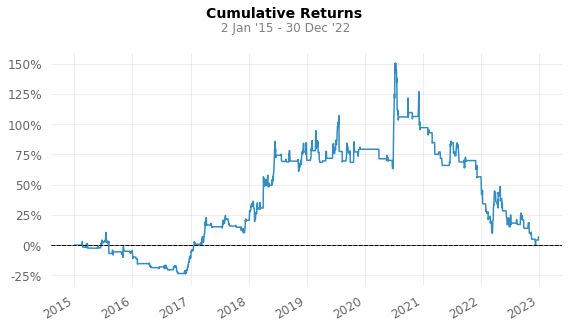

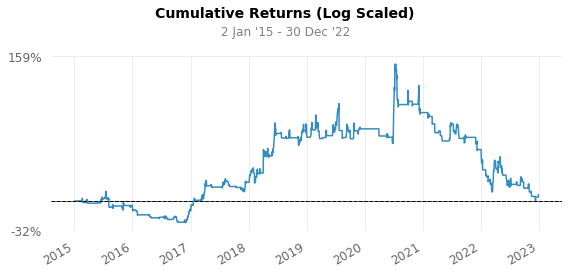

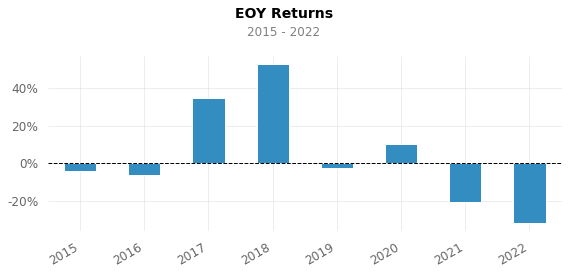

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


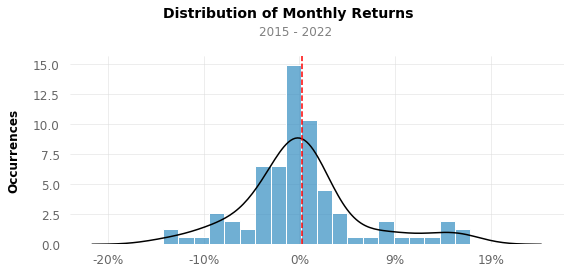

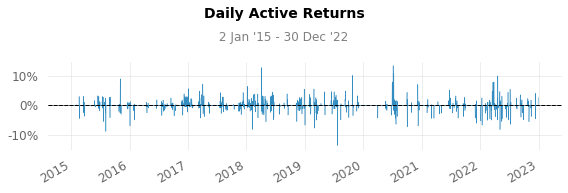

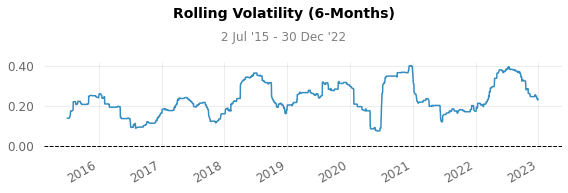

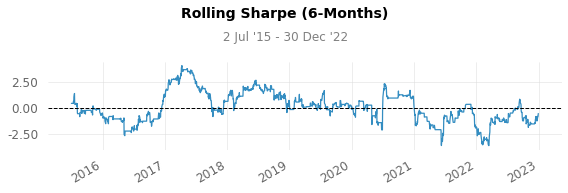

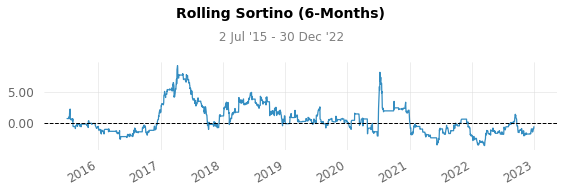

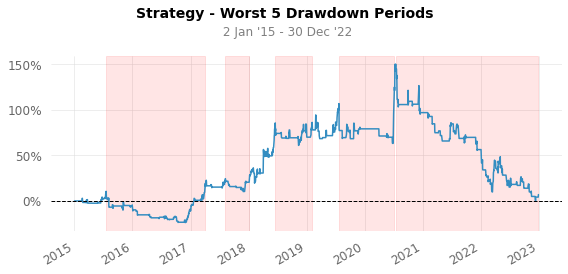

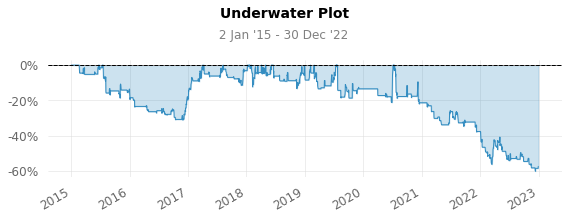

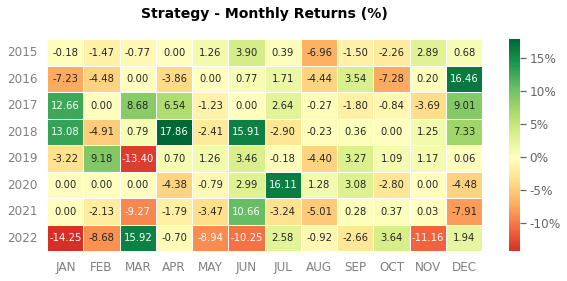

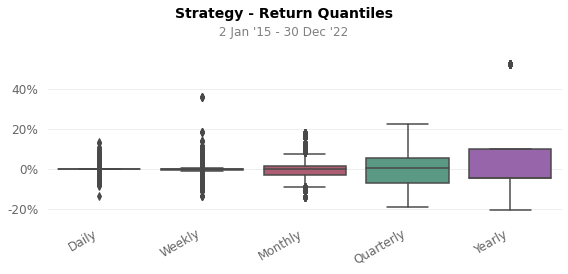

In [5]:
cerebro = bt.Cerebro()

# Download data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)
cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(1000000)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

print('Initial Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]

portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, _, _, _ = portfolio_stats.get_pf_items()

returns.index = returns.index.tz_convert(None)
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
qs.reports.full(returns)

Based on the provided performance metrics, let's analyze the results and draw conclusions from the backtest:

Cumulative Return: The strategy achieved a cumulative return of 7.0% over the entire backtest period (from 2015-01-02 to 2022-12-30). This means that the strategy generated a positive return on investment.

CAGR (Compound Annual Growth Rate): The strategy did not achieve a significant positive CAGR. It indicates that the annualized growth rate of the investment was relatively low.

Risk Measures:

Sharpe Ratio: The strategy's Sharpe ratio is 0.16, suggesting a relatively low risk-adjusted return compared to the risk-free rate.
Sortino Ratio: The Sortino ratio is 0.22, indicating a relatively positive risk-adjusted return considering only downside volatility.
Drawdowns:

Max Drawdown: The maximum drawdown was -59.99%, which means the strategy experienced a significant loss at some point during the backtest period.
Longest DD Days: The longest drawdown lasted for 898 days, indicating a prolonged period of losses.
Volatility: The annualized volatility of the strategy is 24.13%, representing the price fluctuation risk involved in the investment.

Performance Comparison:

Calmar Ratio: The Calmar ratio is 0.01, indicating that the strategy's return was not sufficient compared to the maximum drawdown.
Ulcer Index: The Ulcer Index is 0.25, which is relatively low and suggests a smoother equity curve.
Risk and Losses:

Risk of Ruin: The risk of ruin is 0.0%, indicating that the strategy did not have a risk of losing the entire investment capital.
Worst Drawdowns: The strategy experienced several significant drawdown periods, with the largest drawdown being nearly -60%.
Win/Loss Statistics:

Win Days %: The strategy had winning trades on approximately 51.23% of the trading days.
Win Month %: The strategy had winning months approximately 49.41% of the time.
Monthly Performance:

MTD: The strategy achieved a 1.94% return in the most recent month.
3M, 6M, YTD: The strategy experienced negative returns over the past 3 months, 6 months, and year-to-date.
Based on this analysis, we can conclude that the strategy did not achieve a strong overall performance. It generated a positive cumulative return, but the growth rate was relatively low, and the strategy experienced significant drawdowns. The risk-adjusted measures indicate that the strategy had a relatively low return compared to the risk taken. However, it's worth noting that the strategy had a relatively low risk of ruin and a smoother equity curve.

Recommendation:
Considering the performance and risk metrics, it is advisable to further refine and improve the strategy before deploying it with real funds. Additional analysis and modifications could include optimizing the strategy parameters, considering alternative indicators, or incorporating risk management techniques to reduce drawdowns and improve risk-adjusted returns. It's important to thoroughly backtest and validate any modifications before implementing them in live trading.